In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from matplotlib import animation
from matplotlib.animation import PillowWriter

Define $x$ and $\Psi _0$ (discretized) 

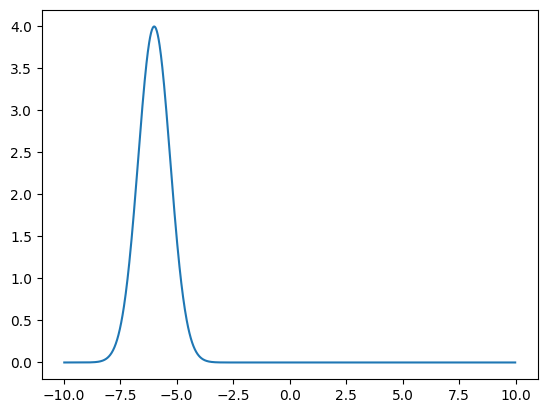

In [2]:
# For x
N = 1000
dx = 1/N
xmin = -10
xmax = 10
x = np.linspace(xmin, xmax, N+1)

# For Psi0
x0 = 6
sigma = 1
p = 40
Psi0 = np.exp(-(x[1:-1]+x0)**2/sigma**2)*np.exp(-1j*p*(x[1:-1]+x0))
A = np.sum((np.abs(Psi0)**2)*dx)
Psi0 = Psi0/(np.sqrt(A))
plt.plot(x[1:-1], np.abs(Psi0))

Define the potential barrier

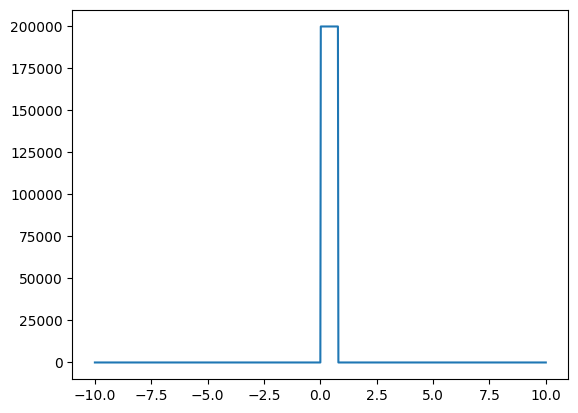

In [3]:
v0 = 200000
V = 0*x
for i in range(len(V)):
    if x[i]<0.8 and x[i]>0:
        V[i]=v0
plt.plot(x, V)

In [4]:
main_dia = 1/dx**2 + V[1:-1]
off_dia = -1/(2*dx**2) * np.ones(len(main_dia) - 1)

E, psi = eigh_tridiagonal(main_dia, off_dia)
psi = psi.T

A = np.sum(np.abs(psi[0]**2*dx))
psi = psi/np.sqrt(A)

999

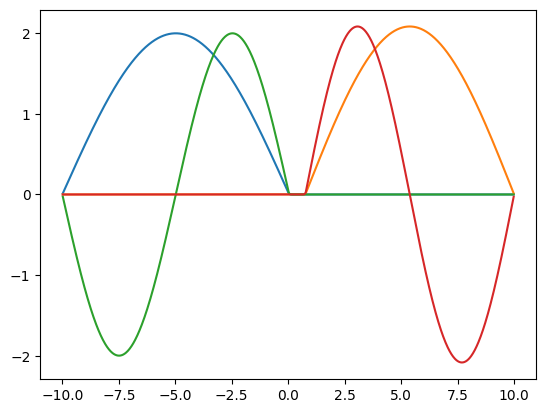

In [5]:
plt.plot(x[1:-1],psi[0])
plt.plot(x[1:-1],psi[1])
plt.plot(x[1:-1],psi[2])
plt.plot(x[1:-1],psi[3])
len(psi)

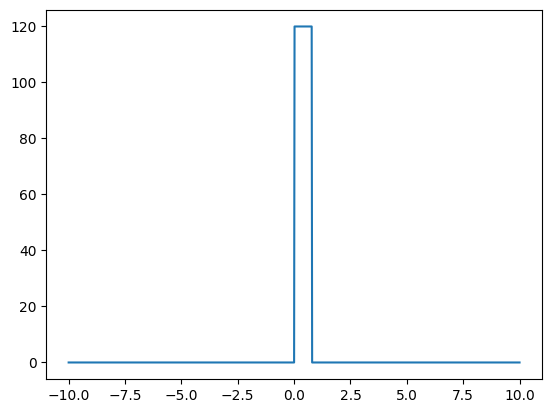

In [13]:
plt.plot(x, 0.0006*V)
c = 0*Psi0
for i in range(len(c)):
    c[i] = np.sum(np.conj(psi[i]*Psi0*dx))


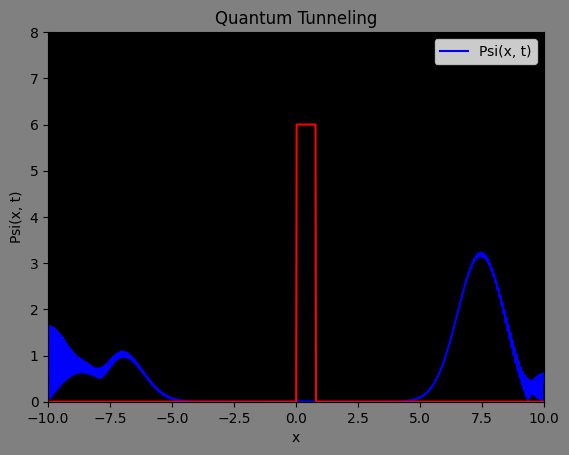

In [14]:
dt = 0.0001
F = 20
t=0
time = np.linspace(0.0, 0.0001*F, F+1)

def Psi_t(t):
    Psi = 0*psi[0]
    for i in range(len(c)):
        Psi = Psi + c[i]*psi[i]*np.exp(-1j*E[i]*t)
    return np.abs(Psi)

# plt.plot(x[1:-1], Psi_t(0))

fig, ax = plt.subplots()
ln, = ax.plot(x[1:-1], Psi_t(t), 'b-', label='Psi(x, t)')
barrier, = ax.plot(x, 0.00003*V, 'r-')
ax.set_xlim(xmin, xmax)
ax.set_ylim(0, 8)
ax.set_xlabel('x')
ax.set_ylabel('Psi(x, t)')
ax.set_title('Quantum Tunneling')
fig.patch.set_facecolor('grey')
ax.set_facecolor('black')

# Animation function
def animate(frame):
    t = (frame/15) * (dt)
    ln.set_ydata(Psi_t(t))
    return ln, barrier,

# Create animation
frames = 200  # Number of frames
ani = animation.FuncAnimation(fig, animate, frames=frames, interval=50, blit=True)
ani.save('Quantum_Tunneling.gif',writer='pillow',fps=25)

# Show the plot
plt.legend()
plt.show()
